# Topic Modeling — Time Series

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or  single text that has been separated into smaller text chunks.

## Dataset

### Trump's Tweets

```{epigraph}
I hear that Fake News CNN just reported that I am isolated in the White House wondering out loud “when will life return to normal?” Does anybody really believe that?

-- Donald Trump, [March 25th 2020 tweet](https://twitter.com/realdonaldtrump/status/1242929613262725122?lang=en)
```

In this particular lesson, we're going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/topics.php), to topic model a CSV file of Donald Trump's tweets and plot the fluctuation of topics over time.

___

```{attention}
If you're working in this Jupyter notebook on your own computer, you'll need to have both the Java Development Kit and MALLET pre-installed. For set up instructions, please see [the previous lesson](http://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-Set-Up.html).

*If you're working in this Jupyter notebook in the cloud via Binder, then the Java Development Kit and Mallet will already be installed. You're good to go!
```

## Set MALLET Path

Since Little MALLET Wrapper is a Python package built around MALLET, we first need to tell it where the bigger, Java-based MALLET lives.

We're going to make a variable called `path_to_mallet` and assign it the file path of our MALLET program. We need to point it, specifically, to the "mallet" file inside the "bin" folder inside the "mallet-2.0.8" folder. 

In [1]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

If MALLET is located in another directory, then set your `path_to_mallet` to that file path.

## Install Packages

In [2]:
#!pip install little_mallet_wrapper
#!pip install seaborn

## Import Packages

Now let's `import` the `little_mallet_wrapper` and the data viz library `seaborn`.

In [8]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

## Get Training Data From CSV File

Before we topic model Donald Trump's tweets, we need to process the tweets and prepare them for analysis. The steps below demonstrate how to process texts if they come from a CSV file.

Note: We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.

## Trump Tweets

This dataset of Donald Trump's tweets is taken from [Trump Twitter Archive](http://www.trumptwitterarchive.com/). To read in the CSV file, we're going to use Pandas.

In [9]:
trump_df = pd.read_csv("../texts/politics/Trump-Tweets.csv", encoding='utf-8')

In [11]:
trump_df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Just finished a very good conversation with President Xi of China. Discussed in great detail the...,03-27-2020 05:19:02,33074,202087,False,1243407157321560000
1,Twitter for iPhone,Will be interviewed on @seanhannity at 9:10 P.M. @FoxNews,03-27-2020 01:05:59,7419,42186,False,1243343475799720000
2,Twitter for iPhone,The world is at war with a hidden enemy. WE WILL WIN! https://t.co/QLceNWcL6Z,03-26-2020 23:50:02,24472,97346,False,1243324360523490000
3,Twitter for iPhone,Our great Oil &amp; Gas industry is under under seige after having one of the best years in reco...,03-26-2020 23:06:28,25514,131210,False,1243313399284500000
4,Twitter for iPhone,Will be going out in 10 minutes for the press conference.,03-26-2020 20:57:15,15797,130201,False,1243280878991790000


In [50]:
trump_df['text'] = trump_df['text'].astype(str)

### Process Trump Tweets

In [51]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in trump_df['text']]

### Get Original Trump Tweets

In [209]:
original_trump_tweets = [title for title in trump_df['text']]

### Get Dataset Statistics

In [53]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 29395
Mean Number of Words: 13.0
Vocabulary Size: 33945


## Training the Topic Model

We're going to train our topic model with the `little_mallet_wrapper.train_topic_model()` function.

So we have to set a few things up first.

### Set Number of Topics

We need to make a variable `num_topics` and assign it the number of topics we want returned.

In [20]:
num_topics = 35

### Set Training Data

We already made a variable called `training_data`, which includes all of our processed Reddit post texts, so we can just set it equal to itself.

In [21]:
training_data = training_data

### Set Other MALLET File Paths

Then we're going to set a file path where we want all our MALLET topic modeling data to be dumped. I'm going to output everything onto my Desktop inside a folder called "topic-model-output" and a subfolder specific to the Reddit posts called "Reddit."

All the other necessary variables below `output_directory_path` will be automatically created inside this directory.

In [22]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/Trump-Tweets'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

### Import Data

We're going to import the data with `little_mallet_wrapper.import_data()`.

In [23]:
little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


### Train Topic Model

Then we're going to train our topic model with `little_mallet_wrapper.train_topic_model()`. The topic model should take about 1-1.5 minutes to train and complete. If you want it, you can look at your Terminal or PowerShell and see what the model looks like as it's training.

In [25]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


## Display Topics and Top Words

In [58]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['fbi', 'campaign', 'clinton', 'trump', 'collusion', 'russia', 'mueller', 'hillary', 'comey', 'report', 'general', 'investigation', 'james', 'information', 'dossier', 'russian', 'intelligence', 'former', 'emails', 'attorney']

✨Topic 1✨

['http', 'tonight', 'interview', 'enjoy', 'foxnews', 'foxandfriends', 'interviewed', 'morning', 'watch', 'discussing', 'show', 'fox', 'miss', 'seanhannity', 'tomorrow', 'today', 'friends', 'minutes', 'cnn', 'bit']

✨Topic 2✨

['https', 'women', 'today', 'law', 'american', 'people', 'nation', 'day', 'thank', 'god', 'men', 'families', 'enforcement', 'country', 'service', 'first', 'love', 'lives', 'america', 'bless']

✨Topic 3✨

['obama', 'iran', 'isis', 'attack', 'syria', 'iraq', 'back', 'president', 'many', 'people', 'stop', 'war', 'fight', 'must', 'nuclear', 'ebola', 'oil', 'turkey', 'home', 'time']

✨Topic 4✨

['china', 'trade', 'deal', 'money', 'dollars', 'much', 'countries', 'billion', 'tariffs', 'many', 'pay', 'billions', 'farmers', 'dea

## Display Top Tweets For Topic

## Load Topic Distributions

In [393]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [210]:
tweet_dict = dict(zip(training_data, original_trump_tweets))

In [219]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

In [220]:
display_top_tweets_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['fbi', 'campaign', 'clinton', 'trump', 'collusion', 'russia', 'mueller', 'hillary', 'comey', 'report', 'general', 'investigation', 'james', 'information', 'dossier', 'russian', 'intelligence', 'former', 'emails', 'attorney']

0.7257 Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia it’s important because they interviewed 200 witnesses and 300000 pages of documents &amp; the Committee has direct access to intelligence information that’s Classified. @GreggJarrett

0.7211 Wow FBI confirms report that James Comey drafted letter exonerating  Crooked Hillary Clinton long before investigation was complete. Many..

0.7211 RT @TomFitton: .@JudicialWatch uncovers major Ohr-Steele-Fusion GPS collusion docs PLUS did Schiff conspire with Cohen to smear @RealDonald…

0.7143 Former FBI top lawyer James Baker just admitted involvement in FISA Warrant and further admitted there  were IRREGULARITIES in the way the Russia probe was handled. They relied h

## Show Topic Words in Context of Full Tweet

In [232]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

In [239]:
display_bolded_topic_words_in_context(topic_number=0, number_of_documents=4)

✨Topic 0✨

['fbi', 'campaign', 'clinton', 'trump', 'collusion', 'russia', 'mueller', 'hillary', 'comey', 'report', 'general', 'investigation', 'james', 'information', 'dossier', 'russian', 'intelligence', 'former', 'emails', 'attorney']



✨✨✨

**0.7257142857142856**

Not only did Senator Burr’s Committee find No **COLLUSION** by the **TRUMP** **CAMPAIGN** and **RUSSIA** it’s important because they interviewed 200 witnesses and 300000 pages of documents &amp; the Committee has direct access to **INTELLIGENCE** **INFORMATION** that’s Classified. @GreggJarrett

✨✨✨

**0.7210884353741497**

Wow **FBI** confirms **REPORT** that **JAMES** **COMEY** drafted letter exonerating  Crooked **HILLARY** **CLINTON** long before **INVESTIGATION** was complete. Many..

✨✨✨

**0.7210884353741497**

RT @TomFitton: .@JudicialWatch uncovers major Ohr-Steele-Fusion GPS **COLLUSION** docs PLUS did Schiff conspire with Cohen to smear @RealDonald…

✨✨✨

**0.7142857142857143**

**FORMER** **FBI** top lawyer **JAMES** Baker just admitted involvement in FISA Warrant and further admitted there  were IRREGULARITIES in the way the **RUSSIA** probe was handled. They relied heavily on the unverified **TRUMP** “**DOSSIER**” paid for by the DNC &amp; **CLINTON** **CAMPAIGN** &amp; funded through a...

## Plot Topics Over Time

## Load Topic Distributions

In [200]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

## Add Topic Distribution Columns

Add column with all topic distributions for every tweet

In [60]:
trump_df['topic_distributions'] = pd.Series(topic_distributions)

Make a separate dataframe with each topic distribution as a separate column

In [70]:
topic_distributions_df = trump_df['topic_distributions'].apply(pd.Series)

Rename each of those columns with the first four words from the topic

In [72]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

Merge that column into the dataframe

In [73]:
trump_df = pd.concat([trump_df, topic_distributions_df], axis=1)

## Date Formatting For Time Series Plot

**Convert to datetime**

In [61]:
trump_df['date'] = pd.to_datetime(trump_df['created_at'])

**Extract year**

In [62]:
trump_df['year'] = pd.to_datetime(trump_df['date'].dt.year, format='%Y')

**Extract year and month**

In [63]:
trump_df['year-month'] = trump_df['date'].dt.to_period('M')

In [65]:
trump_df['Date (by month)'] = [month.to_timestamp() for month in trump_df['year-month']]

((Set year and month as Pandas Index**

In [67]:
trump_df = trump_df.set_index('Date (by month)')

## Plot Individual Topics as Time Series

**Topic 10 Label**: 

Hillary Clinton (Double-click this cell to enter your own label)

For every Trump tweet, plot the probability of Topic 10 

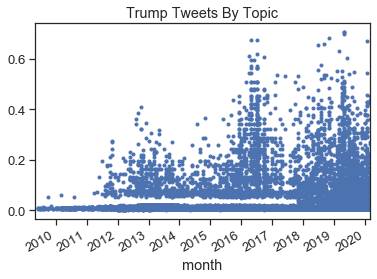

In [272]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

trump_df[topic_label].plot(style='.', title='Trump Tweets By Topic')

For every month of Trump tweets, plot the average probability of Topic 10 

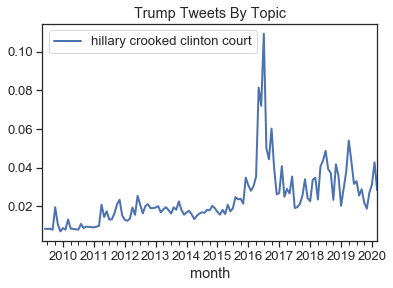

In [266]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

**Topic 18 Label**: 

Fake News (Double-click this cell to enter your own label)

For every month of Trump tweets, plot the average probability of Topic 18

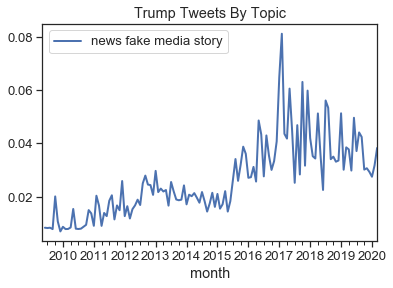

In [274]:
topic_number = 18

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

**Topic 9 Label**: 

Border Wall (Double-click this cell to enter your own label)

For every month of Trump tweets, plot the average probability of Topic 9 

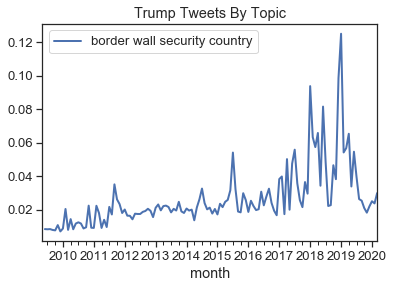

In [306]:
topic_number = 9

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

**Topic 19 Label**: 

Make America Great Again (Double-click this cell to enter your own label)

For every month of Trump tweets, plot the average probability of Topic 19 

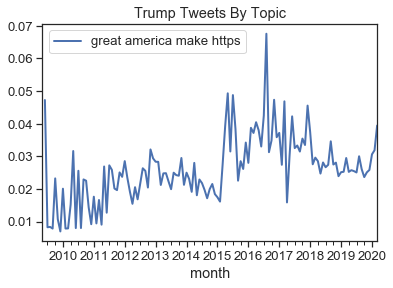

In [280]:
topic_number = 19

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

**Topic 13 Label**: 

The Apprentice (Double-click this cell to enter your own label)

For every month of Trump tweets, plot the average probability of Topic 13 

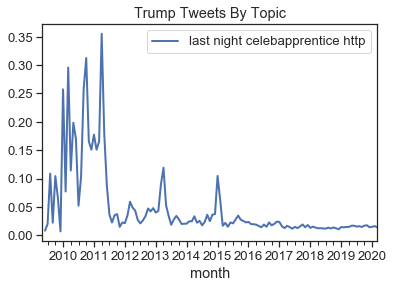

In [307]:
topic_number = 13

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)